<a href="https://colab.research.google.com/github/niketr2001/projects.github.io/blob/main/Examination_of_the_Effect_of_Education_on_Income.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Used data from Kaggle that is based upon the Census Income Data from the UCI Machine Learning Repository

dataset links: https://www.kaggle.com/code/ucfaibot/core-fa19-regression,
 https://archive.ics.uci.edu/ml/datasets/census+income 

report link: https://docs.google.com/document/d/1QK_fZI8BmDKRMhjp92Ie3MqWm4P68xBZp0KJ7mt8HaQ/edit?usp=sharing
 


In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import scipy.stats as st

In [10]:
income_data = pd.read_csv("adult.csv")
income_data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [11]:
income_data.shape

(32561, 15)

In [12]:
def change_income(x):
  if x == "<=50K":
    return 0
  else:
    return 1

def change_sex(x):
  if x == "Female":
    return 0
  else:
    return 1

#quantify sex and income categorical data
income_data["income"] = income_data.apply(lambda row: change_income(row['income']), axis=1)
income_data["sex"] = income_data.apply(lambda row: change_sex(row['sex']), axis=1)


#remove other categorical data 
income_data = income_data.drop(["workclass", "education", "marital.status", "occupation", "relationship", "race", "native.country"], axis = 1)

income_data.head()


,age,fnlwgt,education.num,sex,capital.gain,capital.loss,hours.per.week,income
0,90,77053,9,0,0,4356,40,0
1,82,132870,9,0,0,4356,18,0
2,66,186061,10,0,0,4356,40,0
3,54,140359,4,0,0,3900,40,0
4,41,264663,10,0,0,3900,40,0


In [13]:
#check type
income_data.dtypes

age               int64
fnlwgt            int64
education.num     int64
sex               int64
capital.gain      int64
capital.loss      int64
hours.per.week    int64
income            int64
dtype: object

In [14]:
income_data.describe()

,age,fnlwgt,education.num,sex,capital.gain,capital.loss,hours.per.week,income
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,0.669205,1077.648844,87.303830,40.437456,0.240810
std,13.640433,1.055500e+05,2.572720,0.470506,7385.292085,402.960219,12.347429,0.427581
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.783560e+05,10.000000,1.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.370510e+05,12.000000,1.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.484705e+06,16.000000,1.000000,99999.000000,4356.000000,99.000000,1.000000


In [15]:
# number of men and women in the dataset
income_data["sex"].value_counts()

1    21790
0    10771
Name: sex, dtype: int64

model 1

In [16]:
x = ["education.num"]
x_train, x_test, y_train, y_test = train_test_split(income_data[x], income_data["income"], test_size=0.25, random_state=42)
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty='none')
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[5926,  271],
       [1541,  403]])

Text(0.5, 257.44, 'Predicted label')

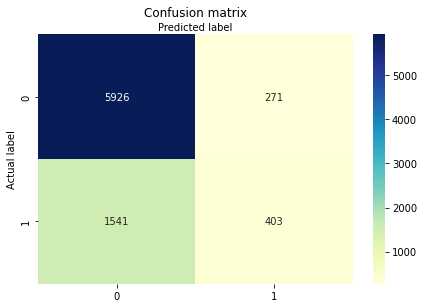

In [17]:
import seaborn as sns
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

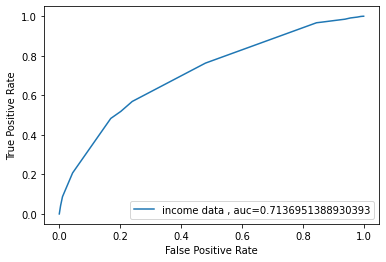

In [18]:
y_pred_proba = lr.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="income data , auc="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

model 2

In [19]:
x = ["age", "fnlwgt", "education.num", "sex", "capital.gain", "capital.loss", "hours.per.week"]
x_train, x_test, y_train, y_test = train_test_split(income_data[x], income_data["income"], test_size=0.25, random_state=42)

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty='none')
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[5998,  199],
       [1446,  498]])

Text(0.5, 257.44, 'Predicted label')

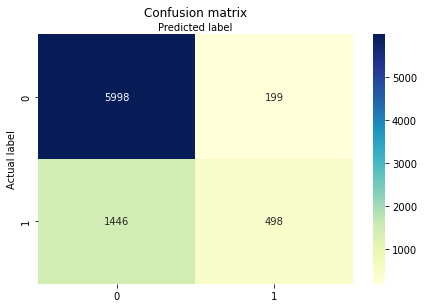

In [20]:
import seaborn as sns
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

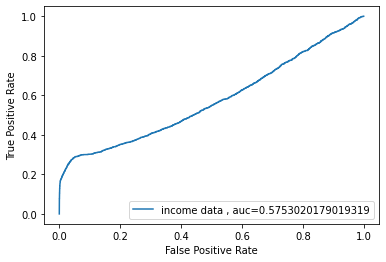

In [21]:
y_pred_proba = lr.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="income data , auc="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()